In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_keys
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys

In [3]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = list(zip(lats, lngs))


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | cape town
Processing Record 2 of Set 13 | genc
Processing Record 3 of Set 13 | lebu
Processing Record 4 of Set 13 | cumaribo
City not found. Skipping...
Processing Record 5 of Set 13 | saint-augustin
Processing Record 6 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 13 | souillac
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | olgod
Processing Record 11 of Set 13 | dikson
Processing Record 12 of Set 13 | bambous virieux
Processing Record 13 of Set 13 | axim
Processing Record 14 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 13 | marawi
Processing Record 16 of Set 13 | ribeira grande
Processing Record 17 of Set 13 | bathsheba
Processing Record 18 of Set 13 | arlit
Processing Record 19 of Set 13 | jamestown
Processing Record 20 o

Processing Record 34 of Set 16 | kaabong
Processing Record 35 of Set 16 | saldanha
Processing Record 36 of Set 16 | great yarmouth
Processing Record 37 of Set 16 | laguna
Processing Record 38 of Set 16 | taoudenni
Processing Record 39 of Set 16 | barranca
Processing Record 40 of Set 16 | pauini
Processing Record 41 of Set 16 | bangassou
Processing Record 42 of Set 16 | kasongo-lunda
Processing Record 43 of Set 16 | sabya
Processing Record 44 of Set 16 | sao luiz gonzaga
Processing Record 45 of Set 16 | bhuj
Processing Record 46 of Set 16 | acarau
Processing Record 47 of Set 16 | alekseyevskoye
Processing Record 48 of Set 16 | gweta
Processing Record 49 of Set 16 | indergarh
Processing Record 50 of Set 16 | ileza
Processing Record 1 of Set 17 | tonantins
Processing Record 2 of Set 17 | marcona
City not found. Skipping...
Processing Record 3 of Set 17 | atasu
Processing Record 4 of Set 17 | gashua
Processing Record 5 of Set 17 | vitry-le-francois
Processing Record 6 of Set 17 | eyl
Proce

Processing Record 20 of Set 20 | ponta delgada
Processing Record 21 of Set 20 | grand gaube
Processing Record 22 of Set 20 | nieuw amsterdam
Processing Record 23 of Set 20 | portsmouth
Processing Record 24 of Set 20 | aurad
Processing Record 25 of Set 20 | koshki
Processing Record 26 of Set 20 | lisala
Processing Record 27 of Set 20 | matsanga
City not found. Skipping...
Processing Record 28 of Set 20 | vetluzhskiy
Processing Record 29 of Set 20 | marzuq
Processing Record 30 of Set 20 | husavik
Processing Record 31 of Set 20 | bereda
Processing Record 32 of Set 20 | kokstad
Processing Record 33 of Set 20 | carutapera
Processing Record 34 of Set 20 | jumla
Processing Record 35 of Set 20 | morant bay
Processing Record 36 of Set 20 | tapes
Processing Record 37 of Set 20 | cape canaveral
Processing Record 38 of Set 20 | murdochville
Processing Record 39 of Set 20 | brae
Processing Record 40 of Set 20 | rockland
Processing Record 41 of Set 20 | tobane
Processing Record 42 of Set 20 | coraco

Processing Record 3 of Set 24 | gboko
Processing Record 4 of Set 24 | severodvinsk
Processing Record 5 of Set 24 | kargasok
Processing Record 6 of Set 24 | zambezi
Processing Record 7 of Set 24 | ajdabiya
Processing Record 8 of Set 24 | gardner
Processing Record 9 of Set 24 | siwani
City not found. Skipping...
Processing Record 10 of Set 24 | hargeysa
Processing Record 11 of Set 24 | ihosy
Processing Record 12 of Set 24 | takoradi
Processing Record 13 of Set 24 | warrington
Processing Record 14 of Set 24 | havoysund
Processing Record 15 of Set 24 | lovozero
Processing Record 16 of Set 24 | zhezkazgan
Processing Record 17 of Set 24 | buenaventura
Processing Record 18 of Set 24 | pyaozerskiy
Processing Record 19 of Set 24 | manaure
Processing Record 20 of Set 24 | sinkat
City not found. Skipping...
Processing Record 21 of Set 24 | stornoway
Processing Record 22 of Set 24 | tayirove
Processing Record 23 of Set 24 | paz de ariporo
City not found. Skipping...
Processing Record 24 of Set 24 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,56.10,92,90,3.00,ZA,2021-07-19 15:46:59
1,Genc,38.7507,40.5603,94.05,15,2,8.37,TR,2021-07-19 15:46:59
2,Lebu,-37.6167,-73.6500,54.88,66,47,13.78,CL,2021-07-19 15:46:59
3,Saint-Augustin,51.2260,-58.6502,74.52,50,100,16.15,CA,2021-07-19 15:47:00
4,Souillac,-20.5167,57.5167,73.36,78,75,16.11,MU,2021-07-19 15:47:00
5,Ushuaia,-54.8000,-68.3000,42.46,70,40,0.00,AR,2021-07-19 15:45:20
6,Olgod,55.8068,8.6286,70.05,69,70,14.07,DK,2021-07-19 15:47:01
7,Dikson,73.5069,80.5464,38.08,80,1,7.49,RU,2021-07-19 15:47:01
8,Bambous Virieux,-20.3428,57.7575,73.22,78,75,16.11,MU,2021-07-19 15:47:01
9,Axim,4.8699,-2.2405,77.54,76,100,7.74,GH,2021-07-19 15:47:02


In [8]:
#Reorder columns
new_column_order = ['City', "Country", "Date", "Lat",'Lng', "Max Temp", "Humidity", "Cloudiness", 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-07-19 15:46:59,-33.9258,18.4232,56.10,92,90,3.00
1,Genc,TR,2021-07-19 15:46:59,38.7507,40.5603,94.05,15,2,8.37
2,Lebu,CL,2021-07-19 15:46:59,-37.6167,-73.6500,54.88,66,47,13.78
3,Saint-Augustin,CA,2021-07-19 15:47:00,51.2260,-58.6502,74.52,50,100,16.15
4,Souillac,MU,2021-07-19 15:47:00,-20.5167,57.5167,73.36,78,75,16.11


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

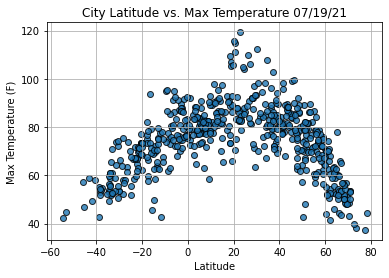

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

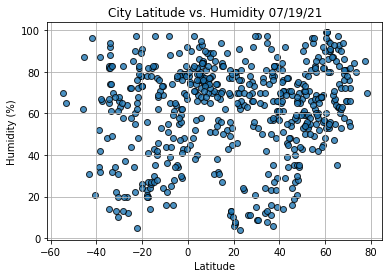

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

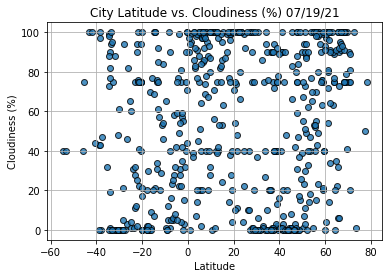

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

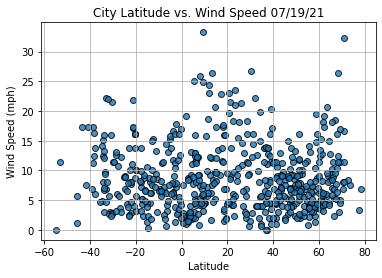

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()